Step 1: Load Libraries and Dependencies

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

Step 2: Load the Dataset

In [2]:
df = pd.read_csv('star_classification.csv')

Step 3: Visualize + Familiarize with the dataset

In [3]:
df.head(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
df.sample(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
29702,1.237663e+18,348.966755,0.815557,22.23981,20.68514,19.38027,18.82421,18.32640,4188,301,5,36,4.739165e+18,GALAXY,0.331626,4209,55478,916
53238,1.237661e+18,143.607725,37.352066,18.71538,17.61800,17.22947,17.07861,17.00727,3560,301,5,242,1.435656e+18,STAR,-0.000460,1275,52996,487
81455,1.237663e+18,225.067551,10.728419,23.90041,20.59403,18.87447,18.25541,17.84822,3996,301,1,140,6.169996e+18,GALAXY,0.327784,5480,56001,236
91146,1.237652e+18,169.406161,2.592333,19.59181,17.77358,16.75870,16.27684,15.89852,1462,301,4,294,5.754328e+17,GALAXY,0.089251,511,52636,356
66106,1.237668e+18,199.521951,20.317778,21.02979,20.57309,20.43239,20.16226,19.82956,5314,301,6,147,6.602285e+18,QSO,0.760970,5864,56047,28


In [5]:
df.isnull().any()

obj_ID         False
alpha          False
delta          False
u              False
g              False
r              False
i              False
z              False
run_ID         False
rerun_ID       False
cam_col        False
field_ID       False
spec_obj_ID    False
class          False
redshift       False
plate          False
MJD            False
fiber_ID       False
dtype: bool

In [6]:
all_columns = df.columns
# for column in all_columns:
#     print(column)
print(all_columns)

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')


In [7]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [8]:
huge_class_label = 'GALAXY'  # Replace this with the actual label of the huge class
desired_instances = 20000

# Filter the huge class instances
huge_class_instances = df[df['class'] == huge_class_label]

# Randomly select desired_instances number of instances
sampled_huge_class_instances = huge_class_instances.sample(n=desired_instances, random_state=42)

# Drop the instances from the original huge class
df_balanced = df.drop(huge_class_instances.index)

# Concatenate the sampled huge class instances with the instances of the other classes
df_balanced = pd.concat([df_balanced, sampled_huge_class_instances])

# Now df_balanced contains a balanced dataset

# Shuffle the rows of the DataFrame to ensure randomness
df_balanced = df_balanced.sample(frac=1, random_state=42)

In [9]:
df = df_balanced.copy()
df['class'].value_counts()

STAR      21594
GALAXY    20000
QSO       18961
Name: class, dtype: int64

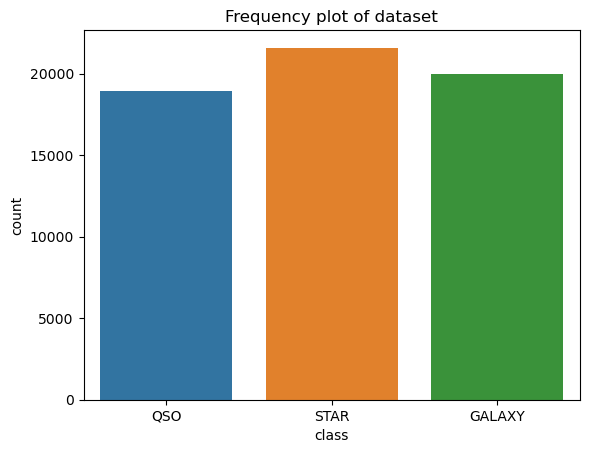

In [10]:
sns.countplot(data = df, x = 'class')
plt.title("Frequency plot of dataset")
plt.savefig("Fig1-Countplot of the dataset")
plt.show()

Step 4: Convert the class or attributes variable having catagorical values to numerical (if any)

Note: Here only class column has catagotical values

In [11]:
label_enc = LabelEncoder()
label_enc.fit(df['class'])

LabelEncoder()

In [12]:
label_enc.classes_

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [13]:
encoded_classes = label_enc.transform(df['class'])
encoded_classes

array([1, 2, 2, ..., 1, 2, 0])

Note: GALAXY is encoded as 0, QSO is encoded as 1 and STAR is encoded as 2

In [14]:
df.drop(columns = ['class'], inplace = True, axis = 1)

In [15]:
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
69290,1.237661e+18,131.343533,30.816320,21.99866,21.78298,21.58936,21.20123,21.12445,3560,301,4,161,1.200791e+19,1.859325,10665,58456,699
33348,1.237662e+18,179.526653,43.388689,21.15862,20.73885,20.79826,20.71907,20.99504,3840,301,6,148,7.478283e+18,-0.000249,6642,56396,204
9221,1.237659e+18,242.516017,37.953707,21.23440,19.99391,19.80719,19.66509,19.87516,3185,301,4,12,5.854724e+18,-0.001363,5200,56091,160
40255,1.237679e+18,35.398807,-5.451710,26.88626,21.77774,20.43220,19.60288,19.14694,7881,301,1,257,4.944046e+18,0.475168,4391,55866,799
87760,1.237651e+18,126.163550,51.084688,22.12825,21.22433,20.80490,20.55736,20.11810,1402,301,3,143,4.153450e+18,-0.000151,3689,55180,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37977,1.237668e+18,221.500829,13.720024,19.22140,17.81807,17.31761,17.04791,16.85478,5322,301,2,80,3.096311e+18,0.028853,2750,54242,312
93383,1.237681e+18,342.098486,27.969796,20.03004,19.57434,19.33218,19.11573,18.99926,8162,301,3,141,8.615394e+18,1.709785,7652,57579,30
2456,1.237664e+18,36.121425,-1.208469,21.98144,22.07973,21.92136,21.49021,21.48342,4263,301,1,357,8.257471e+18,1.622010,7334,56656,441
37751,1.237668e+18,183.351489,22.337118,19.58818,18.55621,18.15174,17.98830,17.90275,5183,301,3,339,2.976900e+18,0.000724,2644,54210,76


In [16]:
df['label'] = encoded_classes

In [17]:
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,label
69290,1.237661e+18,131.343533,30.816320,21.99866,21.78298,21.58936,21.20123,21.12445,3560,301,4,161,1.200791e+19,1.859325,10665,58456,699,1
33348,1.237662e+18,179.526653,43.388689,21.15862,20.73885,20.79826,20.71907,20.99504,3840,301,6,148,7.478283e+18,-0.000249,6642,56396,204,2
9221,1.237659e+18,242.516017,37.953707,21.23440,19.99391,19.80719,19.66509,19.87516,3185,301,4,12,5.854724e+18,-0.001363,5200,56091,160,2
40255,1.237679e+18,35.398807,-5.451710,26.88626,21.77774,20.43220,19.60288,19.14694,7881,301,1,257,4.944046e+18,0.475168,4391,55866,799,0
87760,1.237651e+18,126.163550,51.084688,22.12825,21.22433,20.80490,20.55736,20.11810,1402,301,3,143,4.153450e+18,-0.000151,3689,55180,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37977,1.237668e+18,221.500829,13.720024,19.22140,17.81807,17.31761,17.04791,16.85478,5322,301,2,80,3.096311e+18,0.028853,2750,54242,312,0
93383,1.237681e+18,342.098486,27.969796,20.03004,19.57434,19.33218,19.11573,18.99926,8162,301,3,141,8.615394e+18,1.709785,7652,57579,30,1
2456,1.237664e+18,36.121425,-1.208469,21.98144,22.07973,21.92136,21.49021,21.48342,4263,301,1,357,8.257471e+18,1.622010,7334,56656,441,1
37751,1.237668e+18,183.351489,22.337118,19.58818,18.55621,18.15174,17.98830,17.90275,5183,301,3,339,2.976900e+18,0.000724,2644,54210,76,2


In [18]:
print(df['label'].value_counts())
print('Note: GALAXY is encoded as 0, QSO is encoded as 1 and STAR is encoded as 2')

2    21594
0    20000
1    18961
Name: label, dtype: int64
Note: GALAXY is encoded as 0, QSO is encoded as 1 and STAR is encoded as 2


Step 5: Drop the class and save it on different variable

In [19]:
y = df['label']

In [20]:
X = df.copy()
X.drop(columns = 'label', inplace = True, axis = 1)

In [21]:
X.drop(columns = 'rerun_ID', inplace = True, axis = 1)
print('\"rerun_ID\" column is dropped since it has same value for all 100,000 instances. (Irrelevant feature for Classification)')

"rerun_ID" column is dropped since it has same value for all 100,000 instances. (Irrelevant feature for Classification)


Step 6: Visualize the modified dataset

In [22]:
X.head(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
69290,1.237661e+18,131.343533,30.816320,21.99866,21.78298,21.58936,21.20123,21.12445,3560,4,161,1.200791e+19,1.859325,10665,58456,699
33348,1.237662e+18,179.526653,43.388689,21.15862,20.73885,20.79826,20.71907,20.99504,3840,6,148,7.478283e+18,-0.000249,6642,56396,204
9221,1.237659e+18,242.516017,37.953707,21.23440,19.99391,19.80719,19.66509,19.87516,3185,4,12,5.854724e+18,-0.001363,5200,56091,160
40255,1.237679e+18,35.398807,-5.451710,26.88626,21.77774,20.43220,19.60288,19.14694,7881,1,257,4.944046e+18,0.475168,4391,55866,799
87760,1.237651e+18,126.163550,51.084688,22.12825,21.22433,20.80490,20.55736,20.11810,1402,3,143,4.153450e+18,-0.000151,3689,55180,18


In [23]:
X.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,6.055500e+04,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,6.055500e+04,60555.000000,60555.000000,60555.000000,60555.000000
mean,1.237665e+18,177.480080,24.593675,21.576107,20.278970,19.677073,19.229809,18.807049,4453.790224,3.529139,182.934374,5.973661e+18,0.676208,5305.566939,55691.771282,448.332937
std,8.438805e+12,97.690559,19.823448,40.779603,40.763841,1.841954,1.785051,40.750409,1964.820738,1.596017,145.684996,3.378688e+18,0.900311,3000.861233,1804.300498,272.175620
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,124.844140,5.298090,20.170900,18.977925,18.320365,17.975260,17.720460,3180.000000,2.000000,81.000000,3.014107e+18,0.000037,2677.000000,54479.000000,221.000000
50%,1.237663e+18,180.749844,24.953229,21.737920,20.825580,20.135200,19.552800,19.200710,4135.000000,4.000000,144.000000,5.764721e+18,0.349427,5120.000000,55931.000000,432.000000
75%,1.237669e+18,235.875137,40.849544,23.228385,21.853210,21.075530,20.618465,20.330325,5416.000000,5.000000,236.500000,8.620118e+18,1.022588,7656.000000,57040.000000,642.000000
max,1.237681e+18,359.999810,83.000519,32.781390,30.607000,29.571860,32.141470,29.383740,8162.000000,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


Note: Feature scaling is important here since the attribute values of different attributes differ by huge scale. SO they should be brought to comparable range.

Step 7: Perform Feature scaling using Minmax scalar or standardscalar then visualize the dataframe

In [24]:
columns1 = X.columns
print(columns1)

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate', 'MJD',
       'fiber_ID'],
      dtype='object')


In [25]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [26]:
X = pd.DataFrame(X, columns = columns1)

In [27]:
X

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,-0.454872,-0.472276,0.313906,0.010362,0.036896,1.038193,1.104415,0.056869,-0.454900,0.295025,-0.150562,1.785990,1.314132,1.785980,1.532035,0.920983
1,-0.312237,0.020950,0.948128,-0.010238,0.011282,0.608700,0.834303,0.053693,-0.312393,1.548155,-0.239796,0.445331,-0.751365,0.445354,0.390309,-0.897711
2,-0.645733,0.665740,0.673957,-0.008379,-0.006993,0.070641,0.243850,0.026211,-0.645759,0.295025,-1.173325,-0.035202,-0.752603,-0.035179,0.221267,-1.059372
3,1.744148,-1.454413,-1.515661,0.130217,0.036767,0.409963,0.208999,0.008341,1.744301,-1.584670,0.508400,-0.304740,-0.223302,-0.304771,0.096564,1.288396
4,-1.553269,-0.525301,1.336358,0.013540,0.023191,0.612305,0.743711,0.032173,-1.553228,-0.331540,-0.274117,-0.538738,-0.751256,-0.538705,-0.283642,-1.581099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60550,0.441785,0.450618,-0.548529,-0.057743,-0.060370,-1.280967,-1.222327,-0.047908,0.441881,-0.958105,-0.706560,-0.851625,-0.719041,-0.851618,-0.803515,-0.500905
60551,1.887291,1.685114,0.170311,-0.037913,-0.017286,-0.187244,-0.063908,0.004717,1.887317,-0.331540,-0.287845,0.781888,1.148032,0.781926,1.045970,-1.537009
60552,-0.097264,-1.447016,-1.301608,0.009940,0.044176,1.218438,1.266306,0.065678,-0.097104,-1.584670,1.194818,0.675952,1.050537,0.675956,0.534410,-0.026942
60553,0.371105,0.060103,-0.113834,-0.048748,-0.042262,-0.828113,-0.695509,-0.022191,0.371136,-0.331540,1.071263,-0.886967,-0.750285,-0.886942,-0.821251,-1.367999


In [28]:
X.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,6.055500e+04,6.055500e+04,6.055500e+04,6.055500e+04,6.055500e+04,6.055500e+04,6.055500e+04,6.055500e+04,6.055500e+04,6.055500e+04,6.055500e+04,6.055500e+04,6.055500e+04,6.055500e+04,6.055500e+04,6.055500e+04
mean,-4.326386e-12,-1.724875e-17,3.402814e-18,7.615263e-17,-3.388147e-17,-3.040238e-16,1.491958e-15,2.141426e-17,1.408061e-18,-4.652468e-17,1.443262e-17,5.069019e-17,3.250274e-17,1.595802e-17,-1.167752e-15,-6.782160e-17
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-2.211289e+00,-1.816716e+00,-2.188285e+00,-2.457272e+02,-2.457904e+02,-5.350343e+00,-5.467623e+00,-2.458353e+02,-2.211309e+00,-1.584670e+00,-1.180189e+00,-1.679406e+00,-7.621638e-01,-1.679387e+00,-2.263373e+00,-1.643559e+00
25%,-6.484045e-01,-5.388072e-01,-9.733798e-01,-3.445885e-02,-3.191690e-02,-7.365652e-01,-7.028141e-01,-2.666471e-02,-6.483038e-01,-9.581049e-01,-6.996960e-01,-8.759548e-01,-7.510480e-01,-8.759448e-01,-6.721615e-01,-8.352505e-01
50%,-1.624125e-01,3.347089e-02,1.813796e-02,3.968028e-03,1.340931e-02,2.487202e-01,1.809439e-01,9.660382e-03,-1.622504e-01,2.950252e-01,-2.672526e-01,-6.184103e-02,-3.629680e-01,-6.183840e-02,1.325892e-01,-6.000931e-02
75%,4.898182e-01,5.977603e-01,8.200391e-01,4.051761e-02,3.861887e-02,7.592312e-01,7.779430e-01,3.738095e-02,4.897229e-01,9.215902e-01,3.676842e-01,7.832861e-01,3.847376e-01,7.832593e-01,7.472369e-01,7.115577e-01
max,1.887483e+00,1.868361e+00,2.946376e+00,2.747789e-01,2.533646e-01,5.371942e+00,7.233277e+00,2.595502e-01,1.887317e+00,1.548155e+00,5.532981e+00,2.413170e+00,7.036559e+00,2.413138e+00,1.795851e+00,2.026896e+00


Step 8: Split the dataset into training and testing set, initiate the KNN model (DEFAULT), train the model and inference

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state= 43)

In [30]:
model = KNeighborsClassifier()

In [31]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [32]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 2])

In [34]:
y_test

15538    0
42406    2
39363    0
74679    0
90241    1
        ..
67811    0
92502    2
86493    0
51923    0
7228     0
Name: label, Length: 12111, dtype: int32

Step 9: Confusion Matrix and Classification report

In [35]:
cm = confusion_matrix(predictions, y_test)

In [36]:
cm

array([[3612,  465,  598],
       [ 127, 3201,   27],
       [ 302,   92, 3687]], dtype=int64)

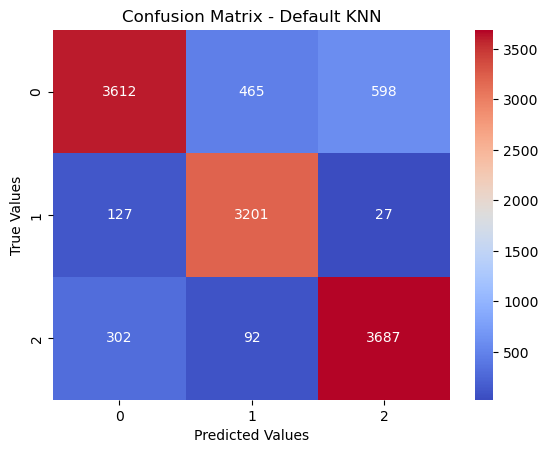

In [37]:
sns.heatmap(cm, annot=True, fmt='', cmap= 'coolwarm', cbar=True)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title("Confusion Matrix - Default KNN")
plt.savefig("Fig2- Default KNN")
plt.show()

In [38]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      4041
           1       0.95      0.85      0.90      3758
           2       0.90      0.86      0.88      4312

    accuracy                           0.87     12111
   macro avg       0.88      0.87      0.87     12111
weighted avg       0.88      0.87      0.87     12111



Step 10: Correlation between feature and class variable


In [39]:
df1= pd.concat([X,y], axis = 1 )

In [40]:
df1

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,label
0,-0.454872,-0.472276,0.313906,0.010362,0.036896,1.038193,1.104415,0.056869,-0.454900,0.295025,-0.150562,1.785990,1.314132,1.785980,1.532035,0.920983,NaN
1,-0.312237,0.020950,0.948128,-0.010238,0.011282,0.608700,0.834303,0.053693,-0.312393,1.548155,-0.239796,0.445331,-0.751365,0.445354,0.390309,-0.897711,0.0
2,-0.645733,0.665740,0.673957,-0.008379,-0.006993,0.070641,0.243850,0.026211,-0.645759,0.295025,-1.173325,-0.035202,-0.752603,-0.035179,0.221267,-1.059372,NaN
3,1.744148,-1.454413,-1.515661,0.130217,0.036767,0.409963,0.208999,0.008341,1.744301,-1.584670,0.508400,-0.304740,-0.223302,-0.304771,0.096564,1.288396,NaN
4,-1.553269,-0.525301,1.336358,0.013540,0.023191,0.612305,0.743711,0.032173,-1.553228,-0.331540,-0.274117,-0.538738,-0.751256,-0.538705,-0.283642,-1.581099,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
96799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
90827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
93383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [41]:
correlation_matrix = df1.corr(method = 'pearson')
correlation_matrix

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,label
obj_ID,1.000000,0.014350,-0.276534,0.013648,0.013986,0.132480,0.128818,0.013054,1.000000,-0.042477,0.035051,0.217088,0.058715,0.217088,0.237271,0.066319,-0.001549
alpha,0.014350,1.000000,0.140540,-0.001545,-0.001642,0.009015,0.012674,-0.001388,0.014351,-0.006145,-0.153022,0.030415,0.014701,0.030415,0.053621,0.031908,-0.006594
delta,-0.276534,0.140540,1.000000,0.003483,0.005353,0.016383,0.022256,0.006227,-0.276535,0.025796,-0.164459,0.139185,0.042433,0.139185,0.143333,0.032820,0.002788
u,0.013648,-0.001545,0.003483,1.000000,0.999629,0.042212,0.035207,0.998851,0.013648,0.004255,-0.009968,0.019960,0.010636,0.019960,0.020419,0.012817,0.006430
g,0.013986,-0.001642,0.005353,0.999629,1.000000,0.048268,0.043238,0.999484,0.013985,0.004198,-0.010436,0.027636,0.017456,0.027636,0.027376,0.014112,0.006503
r,0.132480,0.009015,0.016383,0.042212,0.048268,1.000000,0.957202,0.043657,0.132479,0.006540,-0.020283,0.590412,0.414508,0.590411,0.602926,0.214920,0.000264
i,0.128818,0.012674,0.022256,0.035207,0.043238,0.957202,1.000000,0.045641,0.128817,0.006010,-0.023795,0.602745,0.478978,0.602744,0.614525,0.211952,-0.000135
z,0.013054,-0.001388,0.006227,0.998851,0.999484,0.043657,0.045641,1.000000,0.013054,0.004053,-0.010978,0.028906,0.024682,0.028906,0.028340,0.013229,0.006535
run_ID,1.000000,0.014351,-0.276535,0.013648,0.013985,0.132479,0.128817,0.013054,1.000000,-0.042578,0.035050,0.217088,0.058715,0.217088,0.237272,0.066307,-0.001549
cam_col,-0.042477,-0.006145,0.025796,0.004255,0.004198,0.006540,0.006010,0.004053,-0.042578,1.000000,-0.010280,-0.005262,-0.004964,-0.005264,-0.012003,0.120086,0.003704


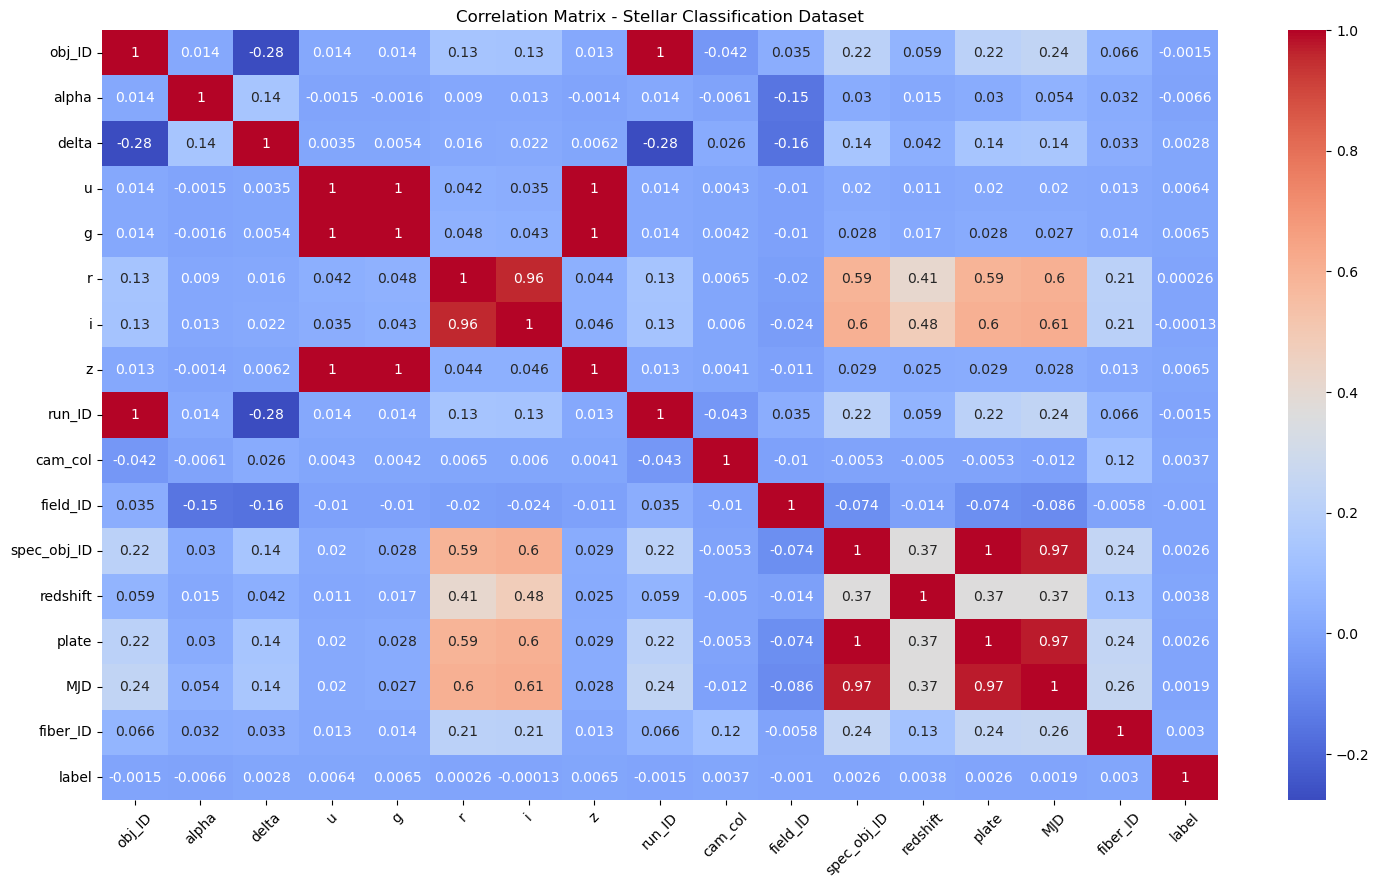

In [42]:
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Stellar Classification Dataset')

# %matplotlib QT
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.savefig("Fig3- Correlation Matix")

# Show the plot
plt.show()

In [43]:
#Plotting the correlation values of the features vs the class variable on bar plot
correlation_values = correlation_matrix['label']
correlation_values

obj_ID        -0.001549
alpha         -0.006594
delta          0.002788
u              0.006430
g              0.006503
r              0.000264
i             -0.000135
z              0.006535
run_ID        -0.001549
cam_col        0.003704
field_ID      -0.001018
spec_obj_ID    0.002610
redshift       0.003817
plate          0.002610
MJD            0.001922
fiber_ID       0.003020
label          1.000000
Name: label, dtype: float64

In [44]:
x_values = correlation_values.index[:-1]
print(x_values)
y_values = correlation_values.values[:-1]

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate', 'MJD',
       'fiber_ID'],
      dtype='object')


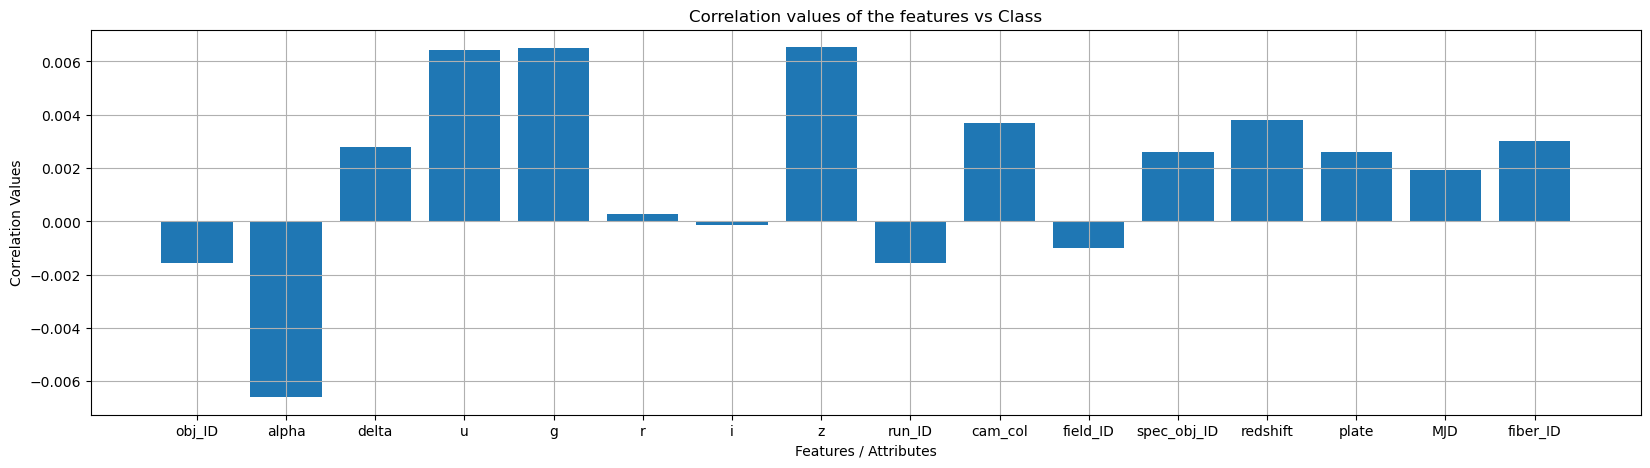

In [45]:
plt.figure(figsize=(20,5))
plt.bar(x_values,y_values)
plt.grid()
plt.title("Correlation values of the features vs Class")
plt.xlabel('Features / Attributes')
plt.ylabel('Correlation Values')
plt.savefig("Fig4-Correlation feature vs class")
plt.show()


Step 11: KNN Model With Weights. Repeat Same Process As Above But With Weighted model.

In [46]:
value = len(X_train.columns)
print(f'Generating {value} weights for weighted KNN since weight should be equal to no of attributes.')
np.random.seed(66)
wts1 = np.random.rand(value)
print(wts1)

Generating 16 weights for weighted KNN since weight should be equal to no of attributes.
[0.15428758 0.13369956 0.36268547 0.67910888 0.19445006 0.25121038
 0.75841639 0.55761859 0.51480292 0.46779986 0.087176   0.82909544
 0.29864056 0.03134589 0.67800576 0.90348903]


In [47]:
model1 = KNeighborsClassifier( metric ='wminkowski', p = 2, metric_params={'w':wts1})

In [48]:
model1.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'wminkowski',
 'metric_params': {'w': array([0.15428758, 0.13369956, 0.36268547, 0.67910888, 0.19445006,
         0.25121038, 0.75841639, 0.55761859, 0.51480292, 0.46779986,
         0.087176  , 0.82909544, 0.29864056, 0.03134589, 0.67800576,
         0.90348903])},
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [49]:
model1.fit(X_train,y_train)

KNeighborsClassifier(metric='wminkowski',
                     metric_params={'w': array([0.15428758, 0.13369956, 0.36268547, 0.67910888, 0.19445006,
       0.25121038, 0.75841639, 0.55761859, 0.51480292, 0.46779986,
       0.087176  , 0.82909544, 0.29864056, 0.03134589, 0.67800576,
       0.90348903])})

In [50]:
predictions1 = model1.predict(X_test)
predictions1

C:\Users\rjtdu\anaconda3\envs\geek\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:277: FutureWarning: WMinkowskiDistance is deprecated in version 1.1 and will be removed in version 1.3. Use MinkowskiDistance instead. Note that in MinkowskiDistance, the weights are applied to the absolute differences raised to the p power. This is different from WMinkowskiDistance where weights are applied to the absolute differences before raising to the p power. The deprecation aims to remain consistent with SciPy 1.8 convention.
  return ArgKmin64.compute(


array([0, 0, 0, ..., 0, 0, 0])

In [51]:
y_test

15538    0
42406    2
39363    0
74679    0
90241    1
        ..
67811    0
92502    2
86493    0
51923    0
7228     0
Name: label, Length: 12111, dtype: int32

In [52]:
cm1 = confusion_matrix(predictions1, y_test)
cm1

array([[3518,  466,  901],
       [ 180, 3156,   77],
       [ 343,  136, 3334]], dtype=int64)

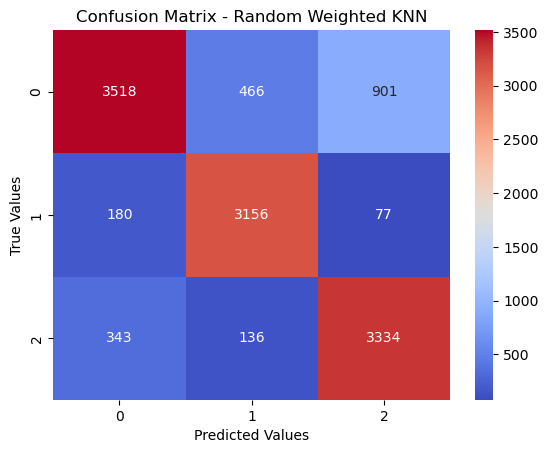

In [53]:
sns.heatmap(cm1, annot=True, fmt='', cmap= 'coolwarm', cbar=True)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title("Confusion Matrix - Random Weighted KNN")
plt.savefig("Fig5- Random Weighted KNN")
plt.show()

In [54]:
report1 = classification_report(y_test, predictions1)
print(report1)

              precision    recall  f1-score   support

           0       0.72      0.87      0.79      4041
           1       0.92      0.84      0.88      3758
           2       0.87      0.77      0.82      4312

    accuracy                           0.83     12111
   macro avg       0.84      0.83      0.83     12111
weighted avg       0.84      0.83      0.83     12111



Step 12: Repeat again the weighted KNN but provide weights 1<= weights <= 4 to top 4 features that are positively correlated with class variable

In [55]:
correlation_values

obj_ID        -0.001549
alpha         -0.006594
delta          0.002788
u              0.006430
g              0.006503
r              0.000264
i             -0.000135
z              0.006535
run_ID        -0.001549
cam_col        0.003704
field_ID      -0.001018
spec_obj_ID    0.002610
redshift       0.003817
plate          0.002610
MJD            0.001922
fiber_ID       0.003020
label          1.000000
Name: label, dtype: float64

In [56]:
print("As you can see only 3 features are positively correlated with the class/labels so providing weights 1<=wts <=3")
wts1[4] = 3
wts1[3] = 2
wts1[12] = 1
wts1[7] = 4 
print(wts1)

As you can see only 3 features are positively correlated with the class/labels so providing weights 1<=wts <=3
[0.15428758 0.13369956 0.36268547 2.         3.         0.25121038
 0.75841639 4.         0.51480292 0.46779986 0.087176   0.82909544
 1.         0.03134589 0.67800576 0.90348903]


In [57]:
model2 = KNeighborsClassifier( metric ='wminkowski', p = 2, metric_params={'w':wts1})

In [58]:
model2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'wminkowski',
 'metric_params': {'w': array([0.15428758, 0.13369956, 0.36268547, 2.        , 3.        ,
         0.25121038, 0.75841639, 4.        , 0.51480292, 0.46779986,
         0.087176  , 0.82909544, 1.        , 0.03134589, 0.67800576,
         0.90348903])},
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [59]:
model2.fit(X_train,y_train)

KNeighborsClassifier(metric='wminkowski',
                     metric_params={'w': array([0.15428758, 0.13369956, 0.36268547, 2.        , 3.        ,
       0.25121038, 0.75841639, 4.        , 0.51480292, 0.46779986,
       0.087176  , 0.82909544, 1.        , 0.03134589, 0.67800576,
       0.90348903])})

In [60]:
predictions2 = model2.predict(X_test)
predictions2

C:\Users\rjtdu\anaconda3\envs\geek\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:277: FutureWarning: WMinkowskiDistance is deprecated in version 1.1 and will be removed in version 1.3. Use MinkowskiDistance instead. Note that in MinkowskiDistance, the weights are applied to the absolute differences raised to the p power. This is different from WMinkowskiDistance where weights are applied to the absolute differences before raising to the p power. The deprecation aims to remain consistent with SciPy 1.8 convention.
  return ArgKmin64.compute(


array([0, 0, 0, ..., 0, 0, 0])

In [61]:
y_test

15538    0
42406    2
39363    0
74679    0
90241    1
        ..
67811    0
92502    2
86493    0
51923    0
7228     0
Name: label, Length: 12111, dtype: int32

In [62]:
cm2 = confusion_matrix(predictions2, y_test)
cm2

array([[3722,  391,  295],
       [  93, 3324,    0],
       [ 226,   43, 4017]], dtype=int64)

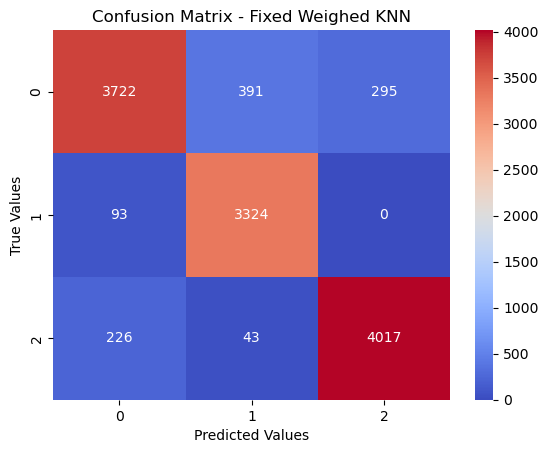

In [63]:
sns.heatmap(cm2, annot=True, fmt='', cmap= 'coolwarm', cbar=True)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title("Confusion Matrix - Fixed Weighed KNN")
plt.savefig("Fig6- Fixed Weighted KNN")
plt.show()

In [64]:
report2 = classification_report(y_test, predictions2)
print(report2)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4041
           1       0.97      0.88      0.93      3758
           2       0.94      0.93      0.93      4312

    accuracy                           0.91     12111
   macro avg       0.92      0.91      0.91     12111
weighted avg       0.92      0.91      0.91     12111



Step 13: Perform K-fold validation to find the optimum value of (k).

In [65]:
#Search space for (k) should be between 1 and 30 with a step size of 2
#Use the cross_val_score method
#K-fold value should be 10 and scoring method should be accuracy

In [66]:
from sklearn.model_selection import cross_val_score
# Define the range of k values
k_values = np.arange(1, 31, step=2)

# Create a list to store cross-validation scores for each k
cross_val_scores = []

# Loop through each k value and perform K-fold cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Create a KNN classifier with k neighbors
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')  # Perform K-fold cross-validation
    cross_val_scores.append(np.mean(scores))  # Store the average accuracy score

# Find the index of the k value with the highest cross-validation score
best_k_index = np.argmax(cross_val_scores)
best_k = k_values[best_k_index]

print("Optimal k value:", best_k)


Optimal k value: 5


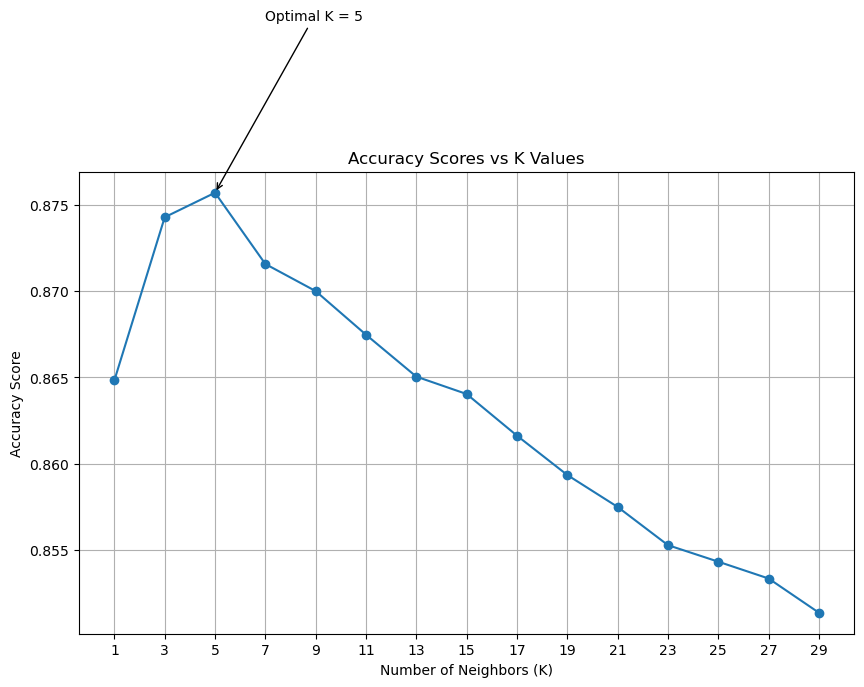

In [67]:
# Create a plot of accuracy scores vs k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cross_val_scores, marker='o')
plt.title('Accuracy Scores vs K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy Score')
plt.xticks(k_values)
plt.grid(True)

# Mark the optimum k value
plt.annotate(f'Optimal K = {best_k}', xy=(best_k, cross_val_scores[best_k_index]), xytext=(best_k + 2, cross_val_scores[best_k_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.savefig("Fig7- Finding Optimum K")
plt.show()

Step 14: Perform KNN classification with optimum (k) value and other parameters 'default'

In [68]:
model_optimum = KNeighborsClassifier(n_neighbors= best_k)
model_optimum.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
model_optimum.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [70]:
predictions3 = model_optimum.predict(X_test)
predictions3

array([0, 0, 0, ..., 0, 0, 2])

In [71]:
y_test

15538    0
42406    2
39363    0
74679    0
90241    1
        ..
67811    0
92502    2
86493    0
51923    0
7228     0
Name: label, Length: 12111, dtype: int32

In [72]:
cm3 = confusion_matrix(predictions3, y_test)
cm3

array([[3612,  465,  598],
       [ 127, 3201,   27],
       [ 302,   92, 3687]], dtype=int64)

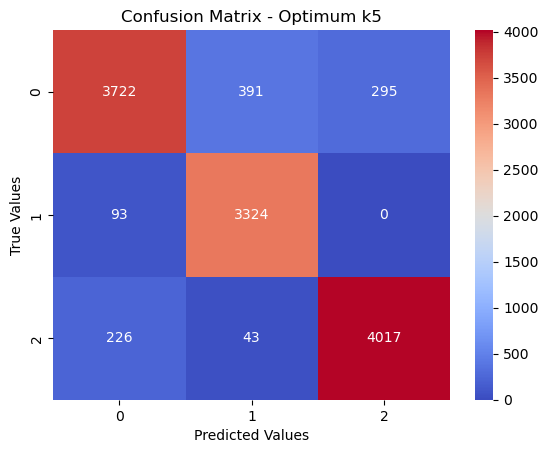

In [73]:
sns.heatmap(cm2, annot=True, fmt='', cmap= 'coolwarm', cbar=True)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title(f"Confusion Matrix - Optimum k{best_k}")
plt.savefig("Fig8 - Optimum k")
plt.show()

In [74]:
report3 = classification_report(y_test, predictions3)
print(report3)

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      4041
           1       0.95      0.85      0.90      3758
           2       0.90      0.86      0.88      4312

    accuracy                           0.87     12111
   macro avg       0.88      0.87      0.87     12111
weighted avg       0.88      0.87      0.87     12111



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                                                                                    THE END

____________________________________________________________________________________________________________________________________________________________________________________